Task 5

In [1]:
from itertools import combinations
import random
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import re
import matplotlib.colors as mcolors
import time
from datetime import timedelta

In [2]:
def erdos_renyi_signed_graph(num_nodes, avg_degree):
    # Generate a random graph using Erdős-Rényi model
    G = nx.erdos_renyi_graph(num_nodes, avg_degree / (num_nodes - 1))
    
    # Assign random signs to the edges
    for u, v in G.edges():
        sign = random.choice([1, -1])
        G[u][v]["sign"] = sign
    
    return G

def read_signed_graph_from_file(file_path):
    
    # read the give file and convert it as graph
    
    graph = {}
    with open(file_path, 'r') as file:
        for line in file:
            source, target, weight = map(int, line.strip().split())
            if source not in graph:
                graph[source] = []
            if target not in graph:
                graph[target] = []
            graph[source].append((target, weight))
            graph[target].append((source, weight))
    return graph

def convert_graph_to_dict(G):
    # making graph_dict for further purpose
    graph_dict = {}
    for u, v, sign in G.edges(data="sign"):
        if u not in graph_dict:
            graph_dict[u] = []
        if v not in graph_dict:
            graph_dict[v] = []
        graph_dict[u].append((v, sign))
        graph_dict[v].append((u, sign))
    
    return graph_dict
    

def visualize_signed_graph(G):

    # Visualize the graph with positive edges in green and negative edges in red
    
    pos = nx.spring_layout(G)
    positive_edges = [(u, v) for u, v, sign in G.edges(data="sign") if sign == 1]
    negative_edges = [(u, v) for u, v, sign in G.edges(data="sign") if sign == -1]

    plt.figure(figsize=(10,8))

    nx.draw_networkx_nodes(G, pos, nodelist = list(G.nodes()), node_color="white", node_size=500, edgecolors='black', linewidths=1.0)
    nx.draw_networkx_edges(G, pos, edgelist=positive_edges, edge_color='green')
    nx.draw_networkx_edges(G, pos, edgelist=negative_edges, edge_color='red')
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

    plt.title("Original Graph")
    plt.tight_layout()


    plt.show()
    

def write_signed_graph_to_file(graph):
    
    # storing generated graph as a .txt file
    
    current_date = datetime.datetime.now().strftime("%Y-%m-%d-%m-%s")
    filename = f"signed_graph_{current_date}.txt"
    
    with open(filename, 'w') as file:
        for u, v, data in graph.edges(data=True):
            sign = data.get('sign', 1)
            file.write(f"{u} {v} {sign}\n")


In [3]:
def compute_max_degrees(graph):
    max_degree = 0
    for node in graph:
        # Initialize variables to count positive and negative degrees of the current vertex
        positive_degree = 0
        negative_degree = 0
        for neighbor, sign in graph[node]:
            # Count positive and negative edges
            if sign == 1:
                positive_degree += 1
            else:
                negative_degree += 1
    
        total_degree = positive_degree + negative_degree
        max_degree = max(max_degree, total_degree)
    return max_degree


def preparing_graph_to_visualize(file_path):
    Grp = nx.Graph()
    graph_list = list()
    with open(file_path, 'r') as file:
        for line in file:
            source, target, weight = map(int, line.strip().split())
            val = (source, target, {'sign':weight})
            graph_list.append(val)
            
    Grp.add_edges_from(graph_list)
    return Grp


def find_neg_edges(graph):
    neg_nodes = {}
    min_neg_degree = float('inf')
    
    for node in graph:
        
        nei_node = []
        node_neg_degree = 0
        
        for nei, sign in graph[node]:
            if sign == -1:
                nei_node.append(nei)
                node_neg_degree += 1
        
        neg_nodes[node] = {'neighbors': nei_node, 'degree_count': node_neg_degree}
        min_neg_degree = min(node_neg_degree, min_neg_degree)
    return neg_nodes, min_neg_degree


def check_smallest_defensive_alliance(graph):
    max_degree = compute_max_degrees(graph)
    print("Maximum degree is",max_degree) 

    if max_degree > 3:
        print("Given graph is not a subcubic graph")
    
    else: 
        neg_nodes, min_neg_degree = find_neg_edges(graph)

        if min_neg_degree <= 1:
            print("ASD of the given graph is", min_neg_degree)
    
            da = []
            for node in neg_nodes:
                if neg_nodes[node]['degree_count'] == min_neg_degree:
                    da.append((node))
            
            print("The defensive alliance of given graph are", da)
        elif min_neg_degree == 2:
            print("ASD of the given graph is ", min_neg_degree)
            da = []
            for node in neg_nodes:
                if neg_nodes[node]['degree_count'] == min_neg_degree:
                    for nei in neg_nodes[node]['neighbors']:
                        if neg_nodes[nei]['degree_count'] == min_neg_degree:
                            da.append((node, nei))
                        
            print("The defensive alliance of given graph are", da)
    
        else:
            print("Given graph has no defensive alliance because the ASD of the given graph is ", min_neg_degree)
    
   
    
    

Maximum degree is 5
Given graph is not a subcubic graph


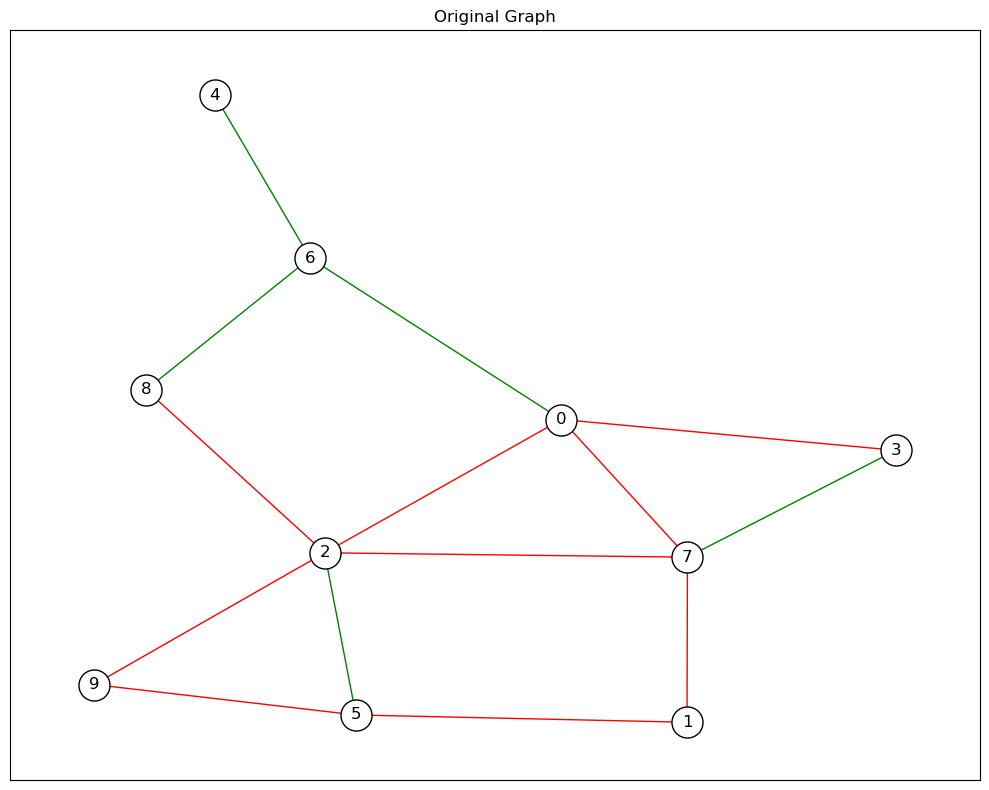

In [4]:
#### Finding smallest defensive alliance in sub cubic graph ######

#### ------- ###### : (This is to generate random graph and caluculating ASD)
num_nodes = 10
avg_degree = 2
G = erdos_renyi_signed_graph(num_nodes, avg_degree)
graph_dict = convert_graph_to_dict(G)
check_smallest_defensive_alliance(graph_dict)
visualize_signed_graph(G)
# write_signed_graph_to_file(signed_graph) # to write the generate graph as a .txt file



#### ------- ###### : (This is for reading file, creating graph and caluculating ASD)

# file_path = r"/Users/mac/Desktop/Desktop/RCS_Signed_Graph/Meeting_2/graph_check/ads_graph_check6.txt"
# # read graph and convert it into dictionary 
# graph_dict = read_signed_graph_from_file(file_path) 
# check_smallest_defensive_alliance(graph_dict)
# G = preparing_graph_to_visualize(file_path)
# visualize_signed_graph(G)

